In [1]:
import dandelion as ddl
import os

/Users/nick/Projects/bcr_fastAPI/.venv/lib/python3.13/site-packages/nxviz/__init__.py:33: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)



[05/21/25 13:19:06] WARNING  branch err (abbrev-err) CompletedProcess(args=['git', '--git-dir',      ]8;id=837495;file:///Users/nick/Projects/bcr_fastAPI/.venv/lib/python3.13/site-packages/setuptools_scm/_run_cmd.py\_run_cmd.py]8;;\:]8;id=957002;file:///Users/nick/Projects/bcr_fastAPI/.venv/lib/python3.13/site-packages/setuptools_scm/_run_cmd.py#78\78]8;;\
                             '/Users/nick/Projects/bcr_fastAPI/.git', 'rev-parse', '--abbrev-ref',                 
                             'HEAD'], returncode=128, stdout='HEAD', stderr="fatal: ambiguous                      
                             argument 'HEAD': unknown revision or path not in the working tree.\nUse               
                             '--' to separate paths from revisions, like this:\n'git <command>                     
                             [<revision>...] -- [<file>...]'")                                                     

                    WARNING  logging the iso date for head failed CompletedProcess(args=['git',      ]8;id=804989;file:///Users/nick/Projects/bcr_fastAPI/.venv/lib/python3.13/site-packages/setuptools_scm/_run_cmd.py\_run_cmd.py]8;;\:]8;id=780927;file:///Users/nick/Projects/bcr_fastAPI/.venv/lib/python3.13/site-packages/setuptools_scm/_run_cmd.py#78\78]8;;\
                             '--git-dir', '/Users/nick/Projects/bcr_fastAPI/.git', '-c',                           
                             'log.showSignature=false', 'log', '-n', '1', 'HEAD', '--format=%cI'],                 
                             returncode=128, stdout='', stderr="fatal: ambiguous argument 'HEAD':                  
                             unknown revision or path not in the working tree.\nUse '--' to separate               
                             paths from revisions, like this:\n'git <command> [<revision>...] --                   
                             [<file>...]'")                                                                        

In [2]:
os.environ["BLASTDB"] = "app/database/blast"
os.environ["GERMLINE"] = "app/database/germlines"
os.environ["IGDATA"] = "app/database/igblast"

In [3]:
samples = ["test_input/mosaic_8b"]

In [4]:
ddl.pp.format_fastas(samples, filename_prefix="filtered")

Formatting fasta(s) :   0%|          | 0/1 [00:00<?, ?it/s]

Formatting fasta(s) : 100%|██████████| 1/1 [00:00<00:00, 31.76it/s]


In [5]:
ddl.pp.reannotate_genes(samples, org="mouse", filename_prefix="filtered")

Assigning genes :   0%|          | 0/1 [00:00<?, ?it/s]/Users/nick/Projects/bcr_fastAPI/.venv/bin/MakeDb.py:124: SyntaxWarning: invalid escape sequence '\s'
  id_key = re.sub('\s|\t', '_', rec.description[:imgt_id_len])
/Users/nick/Projects/bcr_fastAPI/.venv/bin/MakeDb.py:126: SyntaxWarning: invalid escape sequence '\|'
  id_key = re.sub('\||\s|!|&|\*|<|>|\?', '_', rec.description[:imgt_id_len])


         START> MakeDB
       COMMAND> igblast
  ALIGNER_FILE> filtered_contig_igblast.fmt7
      SEQ_FILE> filtered_contig.fasta
       ASIS_ID> False
    ASIS_CALLS> False
      VALIDATE> strict
      EXTENDED> True
INFER_JUNCTION> False

PROGRESS> 13:19:14 |Done                | 0.0 min

PROGRESS> 13:19:15 |####################| 100% (414) 0.0 min

OUTPUT> filtered_contig_igblast_db-pass.tsv
  PASS> 414
  FAIL> 0
   END> MakeDb



/Users/nick/Projects/bcr_fastAPI/.venv/bin/MakeDb.py:124: SyntaxWarning: invalid escape sequence '\s'
  id_key = re.sub('\s|\t', '_', rec.description[:imgt_id_len])
/Users/nick/Projects/bcr_fastAPI/.venv/bin/MakeDb.py:126: SyntaxWarning: invalid escape sequence '\|'
  id_key = re.sub('\||\s|!|&|\*|<|>|\?', '_', rec.description[:imgt_id_len])


         START> MakeDB
       COMMAND> igblast
  ALIGNER_FILE> filtered_contig_igblast.fmt7
      SEQ_FILE> filtered_contig.fasta
       ASIS_ID> False
    ASIS_CALLS> False
      VALIDATE> strict
      EXTENDED> True
INFER_JUNCTION> False

PROGRESS> 13:19:15 |Done                | 0.0 min

PROGRESS> 13:19:15 |####################| 100% (414) 0.0 min

OUTPUT> filtered_contig_igblast_db-pass.tsv
  PASS> 414
  FAIL> 0
   END> MakeDb



Assigning genes : 100%|██████████| 1/1 [00:10<00:00, 10.79s/it]


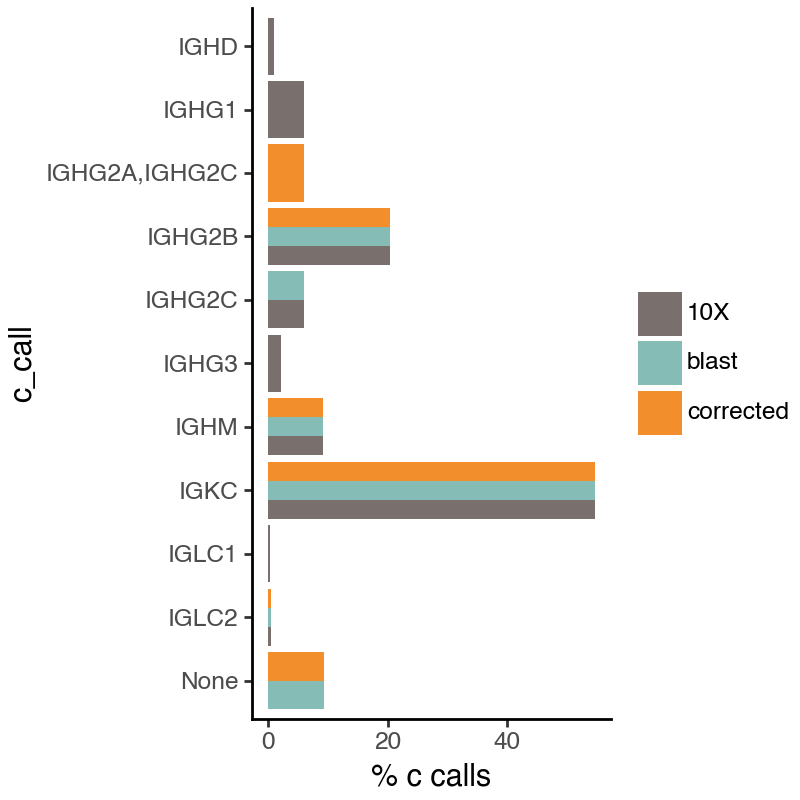

In [6]:
ddl.pp.assign_isotypes(samples, org="mouse", filename_prefix="filtered")

In [7]:
print(samples)

['test_input/mosaic_8b']


In [8]:
vdj_list = []
for sample in samples:
    vdj = ddl.read_10x_airr(sample + "/dandelion/filtered_contig_dandelion.tsv")
    # the dandelion output already has the sample ID prepended at the start of each contig
    vdj_list.append(vdj)
vdj = ddl.concat(vdj_list)

In [13]:
vdj.data.columns

Index(['sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call',
       'j_call', 'sequence_alignment', 'germline_alignment', 'junction',
       ...
       'sequence_alignment_aa', 'v_sequence_alignment_aa',
       'd_sequence_alignment_aa', 'j_sequence_alignment_aa',
       'j_call_multimappers', 'j_call_multiplicity',
       'j_call_sequence_start_multimappers',
       'j_call_sequence_end_multimappers', 'j_call_support_multimappers',
       'rearrangement_status'],
      dtype='object', length=115)